# Notebook 20: Numerical integration

## Congratulations for making it to the final notebook of this series!
Please be sure to checkout other Python courses that are available online:
* https://developers.google.com/edu/python
* https://www.learnpython.org/
* https://www.codecademy.com/catalog/language/python

# Goals of the course!!
You will:

1. Develop problem solving skills including the following:

2. Develop problem solving skills, specifically in solving problems you’ve never seen before.

3. Develop your ability to make profitable wrong turns in solving problems. In other words, learn from your mistakes.

4. Develop your ability to break down complex problems into doable parts.

5. Develop your ability to determine if your answer is reasonable.

Develop programming specific skills including the following:

5. Learn to think like a computer (if loops, for/while loops, functions, arrays....)

6. Understand what ‘the cloud’ is. (we didn't get to this yet! - I might send you an article about this - it's pretty interesting)

7. Know how to make your program “object oriented.”

8. Not be intimidated by reading large data sets in.

9. Not be intimidated by weird error messages.

10. Know how to “debug” your program.



## Some tricks for pandas

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

https://stackoverflow.com/questions/43096522/remove-dollar-sign-from-entire-python-pandas-dataframe

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'A': ["$101", "$1", "$27", "$3", "$18"],
                   'B': ["$75", "$16", "$7", "$18", "$9"],
                   'C': ['a', 'b', 'c', 'd', 'e']})

In [ ]:
df

,A,B,C
0,$101,$75,a
1,$1,$16,b
2,$27,$7,c
3,$3,$18,d
4,$18,$9,e


In [ ]:
df.replace("a", 7)

,A,B,C
0,$101,$75,7
1,$1,$16,b
2,$27,$7,c
3,$3,$18,d
4,$18,$9,e


In [ ]:
df.replace("\$", "", regex=True)
# to remove a dollar sign you need that regex thing - I learned that
# from the second link above

,A,B,C
0,101,75,a
1,1,16,b
2,27,7,c
3,3,18,d
4,18,9,e


In [ ]:
# And what if you only wanted to remove it from one column?
df = pd.DataFrame({'A': ["$101", "$1", "$27", "$3", "$18"],
                   'B': ["$75", "$16", "$7", "$18", "$9"],
                   'C': ['a', 'b', 'c', 'd', 'e']})
df

,A,B,C
0,$101,$75,a
1,$1,$16,b
2,$27,$7,c
3,$3,$18,d
4,$18,$9,e


In [ ]:
df["A"]= df["A"].replace("\$", "", regex=True)
df

,A,B,C
0,101,$75,a
1,1,$16,b
2,27,$7,c
3,3,$18,d
4,18,$9,e


## Sorting values

In [ ]:
df.sort_values(by=["A"], ascending = False)

,A,B,C
3,3,$18,d
2,27,$7,c
4,18,$9,e
0,101,$75,a
1,1,$16,b


In [ ]:
# It didn't work because column A was still strings
# so I'm recasting it as int
# Note that you can do astype and replace in the same line if you want
df["A"]=df["A"].astype(int)
df.sort_values(by=["A"], ascending = False)

,A,B,C
0,101,$75,a
2,27,$7,c
4,18,$9,e
3,3,$18,d
1,1,$16,b


## Numerical integration.
Remember when you learned how to integrate?  And you found out it's the area under the curve?  With a computer you can integrate things you can't do with a pencil and paper, because the computer is good at adding up all the area for you.

First let's just plot a nice simply exponential function so we can have something to integrate:

$$
y = e^{-x}
$$

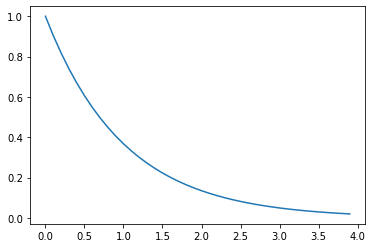

In [ ]:
# First read in libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # (we use this one much further down)
# In order to plot it we need to create an array of x values:
x = np.arange(0,4,0.1)  # 0.1 is the spacing between x-values.  That's going to
# be important in a second.  Remember that.
y = np.exp(-x)
plt.plot(x,y)
#plt.rc('text', usetex=True)  # This let's me use latex things in the labels
#lt.title("$y = e^{-x}$");
plt.show()

What if I told you that I could approximate the same plot by a bunch of really skinny rectangles?

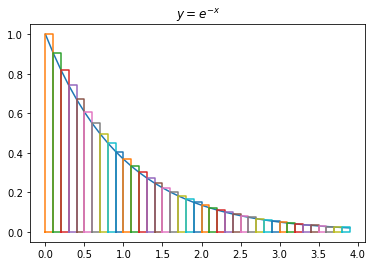

In [ ]:
plt.plot(x, y)
plt.title("$y = e^{-x}$");

for n in range(np.size(y)-1):
    xrect = ([x[n], x[n+1], x[n+1], x[n], x[n]])
    yrect = ([0, 0, y[n],y[n],0])
    plt.plot(xrect,yrect)


plt.show()


## Aside: Linspace vs arange
The difference is that with arange you can specify the stepsize (aka the interval) between the numbers, whereas in linspace you tell it how many number you want and it figures out the step size. They both return numpy arrays.  For numerical integration
I like np.arange because you get to specify the step size, which is the same as the
width of the rectangle.

## Computing the Area Under the Curve
Okay so you may remember your calculus teacher drawing a plot like that (although they didn't draw it in such cool colors!) because they wanted to convince you that the area under the curve was the sum of the area of a bunch of skinny rectangles.  Let's talk about these rectangles...

The area of the nth rectange is its height times its width, or

Area of nth rectangle $ = height \times width = y[n] \times 0.1$

And the sum of the areas of all the rectangles is the height times the width of the 1st
one, plus the height times the width of the second one, plus the height times the width
of the third one, etc.

Sum of the areas of all the rectangles = sum of ($y[n] \times 0.1$) for all n

Oh now this is starting to look like a really good use of a computer, right?

You could do it with a loop, but you don't need to.  Watch this:

sum of ($y[n] \times 0.1$) for all n = (sum of $y[n]$ for all n) $\times 0.1$

In other words, multiplying each y by 0.1 and adding them all up is the same
thing as adding up all the y's, and then multiplying the sum by 0.1.

Let's try it.

In [ ]:
area_under_curve = np.sum(y)*.1
area_under_curve

1.03158651315516

In case you didn't believe that last thing I said, notice that the following gives you the same number. (Here I'm multiplying each y by .1 and then adding them up):


In [ ]:
np.sum(y*.1)

1.03158651315516

Well,  hmmm, how do we know if it did it right, i.e. if this really is a good approximation to the area under the curve?

## Checking this by doing the integral analytically

One way to integrate the function is to do it analytically, i.e. using your brain and a piece of paper. The integral of an exponential is also an exponential.
$$
\int e^{-x}dx = -e^{-x} + constant
$$
So if I were to find the area under the curve shown between x=0 and x=4 I could do a definite integral as follows:
$$
\int_0^4 e^{-x} dx= -e^{-x}|_0^4
$$
$$
                =-e^{-4} - -e^{-0}
$$
(Ask your nearest science/math person or a TA or me if you'd like some reminders about how to do definite integrals.)
Let's use python to figure out what that value is.

In [ ]:
print (-np.exp(-4)+np.exp(-0))

0.9816843611112658


## Well that's sort of close.  
If I were you I wouldn't be too impressed yet.

The thing about numerical integration is that you get closer to the right answer if
you make your step sizes smaller (the rectangles thinner).  Let's try making the width a lot smaller.

In [ ]:
# Notice now I'm creating a variable width that I use in both the call
# to arange and the sum at the end
width = .00001
x = np.arange(0,4,width)  # 0.1 is the spacing between x-values.  That's going to
# be important in a second.  Remember that.
y = np.exp(-x)
sum(y*width)

0.9816892695412361

That was pretty close!!  Set the width to smaller and smaller numbers and you'll get closer and closer.

# Assignment:
Try this on your own with a different function. It's fun if it's something that you know how to integrate analytically, because then you can check your answer.

If you'd like a suggestion for a function, I'd try a polynomial like:

$$
y = x^3 + 3x^2 + 2x + 1
$$

Challenge exercises:
* The integral will also be closer if you use a value of the function at the middle of the interval.  I think we used a value at either the right or the left side.  See if you can fix that.
* Try making the width of the rectangles smaller.  See if you can get closer to the analytical answer.

If you want help integrating that polynomial just let me know.  There's no calculus pre-requisite for this class!

Rachel's solutions are below...so don't look at them until you want to.

## Rachel's solutions

In [ ]:
## My solutions to the above
width = .01
x = np.arange(0,4,width)  # 0.1 is the spacing between x-values.  That's going to
# be important in a second.  Remember that.
def poly(x):
    return x**3 + 3*x**2 + 2*x + 1
sum(poly(x)*width)

147.40059999999994

# The analytic integral

$$
\int_0^4 ydx = \left(\frac{x^4}{4} + 3\frac{x^3}{3} + 2\frac{x^2}{2} + x\right)\Big|_0^4
$$

In [ ]:
# Let's make python calculate that for us
def intpoly(x):
    return x**4/4 + x**3 + x**2 + x
print(intpoly(4) - intpoly(0))

148.0


The center of the bins problem.  There are a bunch of different ways of doing this.  
I liked this way the best.

In [ ]:
# Can I get closer by making it use the center the bins as the height?
# Taka Suzuki had my favorite solution for this.  Move the x-values over by half
# a bin-width
width = .01
x = np.arange(0+.5*width,4+.5*width,width)
sum(poly(x)*width)

147.9997

In [ ]:
# Indeed that's closer!!

# I had to convince myself that was the right thing by printing out the x-values.
# Sure enough they start at the middle of the bin that goes from 0.00 and 0.01
# and increment by .01.
x

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995, 1.005, 1.015, 1.025, 1.035, 1.045, 1.055, 1.065, 1.075,
       1.085, 1.095, 1.105, 1.115, 1.125, 1.135, 1.145, 1.155, 1.165,
       1.175, 1.185, 1.195, 1.205, 1.215, 1.225, 1.235, 1.245, 1.255,
       1.265, 1.275,

# Assignment #2

## Exercise


Create a class that has the following attributes (remember 'attribute' here is a technical term.  They're the things in the class designated by self.something, for example self.xdata.)
* xdata (an array of y-values)
* ydata (an array of x-values)
* the parameters of the model fit

Create a method in the class that fits the data to a model.  The model could be
* a Gaussian  $y = Ae^{-\left(\frac{x-c}{b}\right)^2}$
* an exponential  $y = e^{-x}$
* a polynomial $y = Ax^3 + Bx^2 + Cx + D$

Add a method that plots the data and the model together.
Add a method that integrates the model, i.e. find the area under the curve.

In order to test your class and its methods. Create a data set for yourself by using a simple model (Gaussian, exponential, polynomial) and adding random noise to it.  For example to create a linear data set with random noise on it I would say:

<code>
x=np.arange(100)           # Create evenly spaced x-values
y = 2.7*x+14 + np.random.normal(loc=0, scale=7.0, size=100)    #create linear y-values with
#slope of 2.7 and a y-intercept of 14. Add normally distributed noise.
</code>

## My advice:  
Construct this one piece at a time. For example, first just create a class that contains xdata as an attribute.  Make sure it
works.  Then add ydata.  Make sure it works. (I did those two for you).  Then add a method that plots. Make sure it works. Then add a method that fits whatever function you wanted to fit. Make sure it works.  You get the pattern!

## There is starter code below!
It's not the solution, it's just a reminder about how some of the pieces work, i.e. a simple class, and how to use curve fit.


### If you want to do more:
* Add a second fitting method that uses a different model
* Experiment with how much noise you can add to your data before the fitting fails.



In [ ]:
class Data:
    """A class for plotting data"""
    def __init__(self, xvalues, yvalues):   # Two attributes so far:  xdata and ydata
        self.xdata = xvalues
        self.ydata = yvalues

    def plot(self):     # This is a "method" because it's inside a Class
        plt.plot(self.xdata, self.ydata, '.')

In [ ]:
xx = np.arange(0,100,1)
yy = 2.7*xx+14 + np.random.normal(loc=0, scale=7.0, size=100)
mydata = Data(xx, yy) # Instantiate the class, i.e. "mydata" is an instance
# of the class "Data"

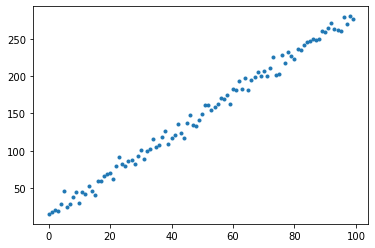

In [ ]:
# Use the method plot on the class
mydata.plot()

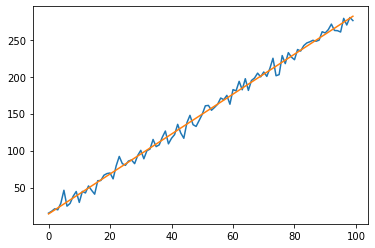

In [ ]:
# And here's a curve-fit reminder.  I didn't put curve-fit into the class yet:
def func(x, a, b):
    return a * x + b
popt, pcov = curve_fit(func, xx, yy)
plt.plot(xx,yy)
plt.plot(xx, func(xx, *popt))

## More practice with Python Classes

In [ ]:
"""A Python class dealing with finding specific numbers, and or
pairs of numbers.
Among the things it does:
* Tells you if a given number is in your data
* finds a pair of elements (indices of the two numbers)
from a given array whose sum equals a specific target number.
"""
class MyData:

    def __init__(self, nums):
        self.nums = nums

    def recognize(self, target):  # verb
        # returns true if target is in data, False if not
        # This method looks for target in the numbers in attribute "nums"
        if target in self.nums:
            return True
        else:
            return False

    def sumTwo(self, target): # Note camelCase notation, and verb
        # returns the two locations of numbers that add up
        # to target
        for num in self.nums:
            if (target-num) in self.nums:
                print(num, target-num)


In [ ]:
# First let's try it on some prescribed data
somenumbers = ([10,20,30,40,50])
mynum = MyData(somenumbers)  # Instantiate the class
mynum.recognize(10)  # Use method recognize on my object "mynum"

True

In [ ]:
mynum.recognize(15)

False

In [ ]:
somenumbers = np.arange(100)
myseqnum = MyData(somenumbers)  # Instantiate the class
myseqnum.sumTwo(30)  # Use method recognize on my object "mynum"

0 30
1 29
2 28
3 27
4 26
5 25
6 24
7 23
8 22
9 21
10 20
11 19
12 18
13 17
14 16
15 15
16 14
17 13
18 12
19 11
20 10
21 9
22 8
23 7
24 6
25 5
26 4
27 3
28 2
29 1
30 0


In [ ]:
# Let's try the sumtwo method on some random numbers (this wasn't
# on the quiz)
somenumbers = np.random.normal(0,100, 50).astype(int)


In [ ]:
somenumbers

array([ 108,  -73,  -77,   42,  -45, -121,  -47,  102,   48,   27, -143,
        173,   50,  -75,  -43,  148, -198,   56,  -30,   -5,  138,  -68,
         -8,  -73,   98,  -82,   66, -104,   67,   89,  -16, -353,   36,
       -167,  -85,  -80,   45,   80,  -53,  -99,   -5, -178,  -48,   79,
        121,   88,  169,  -58,   58,   16])

In [ ]:
myrandomnum = MyData(somenumbers)  # Instantiate my object in the class MyData

In [ ]:
myrandomnum.sumTwo(30)

-143 173
173 -143
-68 98
98 -68
88 -58
-58 88


## Solutions to Pair programming assignment #2

## You have accumulated skills that you haven't explicitly used in labs (unless you've used them in yours), but which will be on the final.  So let's practice:
* fitting to an arbitrary function
* creating and using a class
* numerical integration
* creating random numbers

## Exercise
_My advice:  Construct this one piece at a time. For example, first just create a class that contains xdata as an attribute.  Make sure it
works.  Then add ydata.  Make sure it works. (I did those two for you).  Then add a method that plots. Make sure it works. Then add a method that fits a line. Make sure it works.  You get the pattern!

Create a class that has the following attributes (remember 'attribute' here is a technical term.  They're the things in the class designated by self.something, for example self.xdata.)
* xdata (an array of y-values)
* ydata (an array of x-values)
* the parameters of the model fit

Create a method in the class that fits the data to a model.  The model could be
* a Gaussian  $y = Ae^{-\left(\frac{x-c}{b}\right)^2}$
* an exponential  $y = e^{-x}$
* a polynomial $y = Ax^3 + Bx^2 + Cx + D$

Add a method that plots the data and the model together.
Add a method that integrates the model, i.e. find the area under the curve.

In order to test your class and its methods. Create a data sets for yourself by using a simple model (Gaussian, exponential, polynomial) and adding random noise to it.  For example to create a linear data set with random noise on it I would say:

x=np.arange(100)           # Create evenly spaced x-values <br>
y = 2.7*x+14 + np.random.normal(loc=0, scale=7.0, size=100)       # create linear y-values with <br>
        #slope of 2.7 and a y-intercept of 14.  Add normally <br>
        #distributed noise centered at 0, with a scale of 7<br>


### If you want to do more:
* Add a second fitting method that uses a different model
* Experiment with how much noise you can add to your data before the fitting fails.


Below is the solution from two former class members, Allie Brenton and  Bayan (Bayan credits Allie).
I really like it because
* It's really flexible.  Notice that to self_fit they passed the function, so they can input any function they want.
* I didn't think of this solution.

In [ ]:
class Data:
    """A class for plotting data"""
    def __init__(self, xvalues, yvalues):   # Two attributes so far:  xdata and ydata
        self.xdata = xvalues
        self.ydata = yvalues

    def plot(self):     # This is a "method" because it's inside a Class
        plt.plot(self.xdata, self.ydata, '.')

    def self_fit(self, func):
        popt, pcov = curve_fit(func, self.xdata, self.ydata)
        plt.plot(self.xdata, func(self.xdata, *popt))
        plt.plot(self.xdata, self.ydata, ".")

In [ ]:
xx = np.arange(0,100,1)
yy2 = np.exp(-0.5 * xx + 2) # Create exponential data
yy3 = 5*xx**2 + 3  # Creating polynomial data
mydata2 = Data(xx, yy2)  # instantiating class
mydata3 = Data(xx, yy3)

In [ ]:
def func_exp(x, a, b):
    return np.exp(a * x + b)
def func_quad(x, a, b, c):
    return a*x**b + c

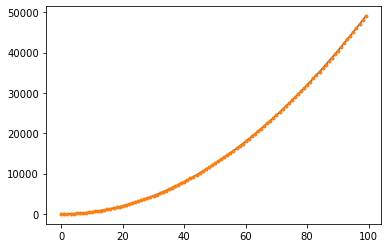

In [ ]:
mydata3.self_fit(func_quad)

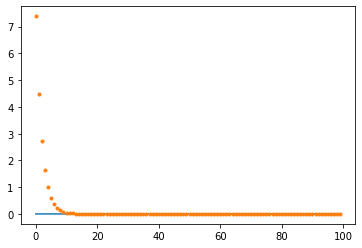

In [ ]:
mydata2.self_fit(func_exp)